<a href="https://colab.research.google.com/github/amankiitg/GenAI/blob/main/Take_Home_Assignment_BPE_Compression_Ratio_Comparison_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPE and Tokenization assignment

This notebook demonstrates:
- Applying BPE on text in English, French, Spanish, and German.
- Computing compression ratios for each language using BPE.
- Computing compression ratios using the GPT tiktoken library and comparing
- Computing the effect of vocabulary size on compression ratio for English, French, Spanish and German.
- Analyzing the effect of file size on the compression ratio for English text.





```
Make use of LLMs like ChatGPT and Claude to help you with code!

You can give a good, detailed prompt and get code for plotting, varying file sizes etc.

Make sure to use the codes we discussed in class also.
```



##Step 1: Install necessary packages
You might need tiktoken and matplotlib


In [24]:
! pip install tiktoken

import tiktoken

In [25]:
import matplotlib.pyplot as plt

##Step 2: Write BPE code which takes a text file, performs BPE and finds compression ratio.

- You can use the code we discussed in class.

- The dataset files for all languages (English, French, German and Spanish) have been provided to you.

- Note that you can consider the final vocabulary size you can consider = Original vocabulary size  + 200 extra tokens.

In [26]:
## Your code here. Feel free to use ChatGPT, Claude for help.

In [27]:
def get_stats(ids):
    counts = {}
    for pair in zip(ids, ids[1:]):
        counts[pair] = counts.get(pair, 0) + 1
    return counts

def merge(ids, pair, idx):
    newids = []
    i = 0
    while i < len(ids):
        if i < len(ids) - 1 and ids[i] == pair[0] and ids[i + 1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1
    return newids


def read_file_tokenize(filename,ratio=1):

  with open(filename, "r", encoding="utf-8") as f:
      raw_text = f.read()

  len_text = len(raw_text)
  fraction = 1/ratio
  raw_text = raw_text[:int(len_text * fraction)]
  print("Total number of character:", len(raw_text))

  tokens = raw_text.encode("utf-8") # raw bytes
  tokens = list(map(int, tokens))
  return raw_text, tokens

def get_bpe_compression_ratio(tokens, num_merges = 200):
  # ---
  vocab_size = len(set(tokens))  # the desired final vocabulary size
  ids = list(tokens)  # copy so we don't destroy the original list

  merges = {}  # (int, int) -> int
  for i in range(num_merges):
      # 1) Count all adjacent pairs in our current sequence 'ids'.
      stats = get_stats(ids)
      pair = max(stats, key=stats.get)
      idx = 128 + i
      # Decode the characters of the pair for display
      char_pair = (chr(pair[0]), chr(pair[1]))
      # print(f"merging {pair} ({char_pair[0]}{char_pair[1]}) into a new token {idx}")
      ids = merge(ids, pair, idx)
      merges[pair] = idx

  print("tokens length:", len(tokens))
  print("ids length:", len(ids))
  print(f"compression ratio: {len(tokens) / len(ids):.2f}X")
  return len(tokens) / len(ids)

In [28]:
lang_list = ['Egnlish','French','German','Spanish']
filelist = ['input.txt','output_french.txt','output_german.txt','output_spanish.txt']
output = []
for c in filelist:
  _, tokens = read_file_tokenize(c)
  output.append(get_bpe_compression_ratio(tokens))

Total number of character: 1115394
tokens length: 1115394
ids length: 598357
compression ratio: 1.86X
Total number of character: 1244159
tokens length: 1272238
ids length: 635725
compression ratio: 2.00X
Total number of character: 1284261
tokens length: 1300508
ids length: 643558
compression ratio: 2.02X
Total number of character: 1172872
tokens length: 1200439
ids length: 608688
compression ratio: 1.97X


##Step 3: Make bar plot of compression ratio for the 4 languages: English, French, German and Spanish.

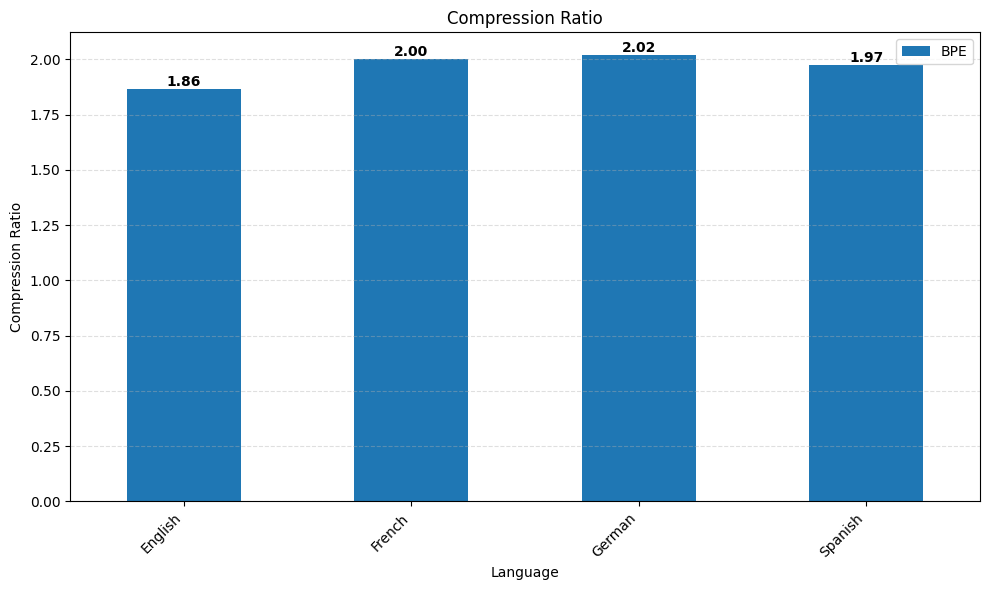

In [29]:
import pandas as pd
lang_list = ['English','French','German','Spanish']
df_comp = pd.DataFrame([output],columns=lang_list)
df_comp = df_comp.T
df_comp.columns = ['BPE']
# Create the bar plot
ax = df_comp.plot(kind='bar', figsize=(10, 6))

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontweight='bold')

# Set x-axis label
plt.xlabel("Language")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set title
plt.title("Compression Ratio")

# Add y-axis label for clarity
plt.ylabel("Compression Ratio")

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
## Your code here. Feel free to use ChatGPT, Claude for help.

##Step 4: Use tiktoken library and use tokenization schemes for GPT-2, GPT-3.5 and GPT-4. Find compression ratio for all 4 languages.

- You can use the tiktoken code we have seen in class.

In [31]:
final = []
for i, fn in enumerate(filelist):

  raw_text, tokens = read_file_tokenize(fn)

  output_gpt = [output[i]]

  for gpt_model in ['gpt-2','gpt-3.5-turbo','gpt-4']:
    tokenizer_gpt = tiktoken.encoding_for_model(gpt_model)
    token_ids_gpt = tokenizer_gpt.encode(raw_text)

    tokens = raw_text.encode("utf-8") # raw bytes
    tokens = list(map(int, tokens))
    print(f"compression ratio: {len(tokens) / len(token_ids_gpt):.2f}X")
    output_gpt.append(len(tokens) / len(token_ids_gpt))

  final.append(output_gpt)

final

Total number of character: 1115394
compression ratio: 3.30X
compression ratio: 3.70X
compression ratio: 3.70X
Total number of character: 1244159
compression ratio: 2.53X
compression ratio: 3.33X
compression ratio: 3.33X
Total number of character: 1284261
compression ratio: 2.42X
compression ratio: 3.36X
compression ratio: 3.36X
Total number of character: 1172872
compression ratio: 2.48X
compression ratio: 3.27X
compression ratio: 3.27X


[[1.8640945121390742,
  3.2997381850454848,
  3.695450072723297,
  3.695450072723297],
 [2.001239529670848, 2.530180480286382, 3.332105853142384, 3.332105853142384],
 [2.020809313224294,
  2.4184384106280463,
  3.3583943848920956,
  3.3583943848920956],
 [1.9721745787661331,
  2.4784996521046123,
  3.2749397767853488,
  3.2749397767853488]]

## Step 5: Make bar plots to compare compression ratios for BPE, GPT-2, GPT-3.5 and GPT-4 for all 4 languages

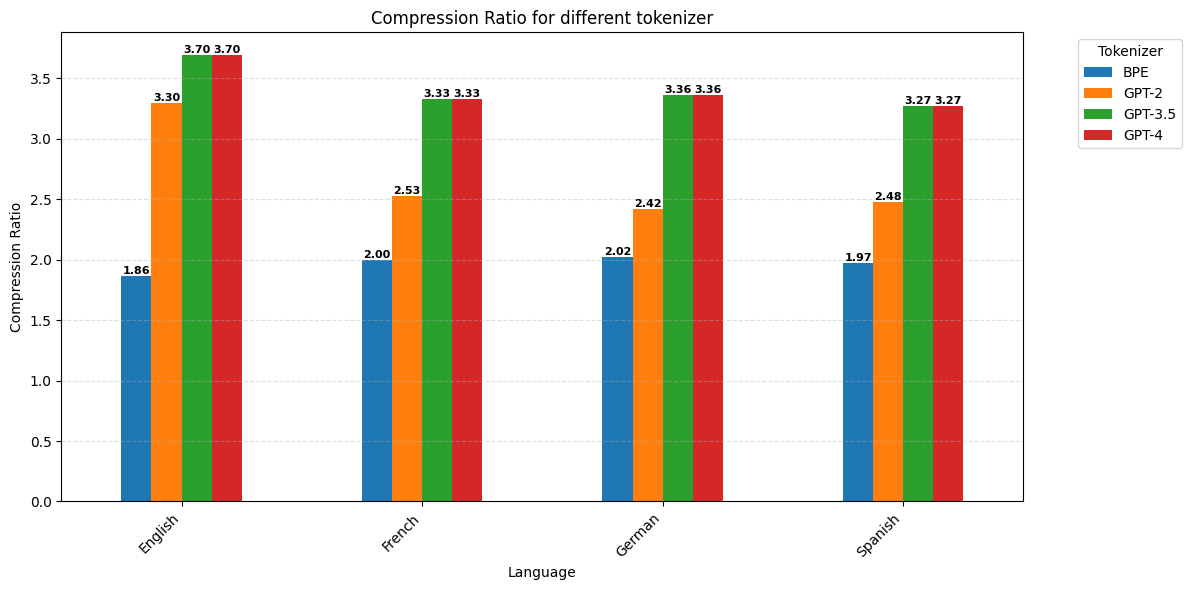

In [32]:
df_comp_all = pd.DataFrame(final,columns=['BPE','GPT-2','GPT-3.5','GPT-4'],index=lang_list)

ax = df_comp_all.plot(kind='bar', figsize=(12, 6))

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8, fontweight='bold')

# Set x-axis label
plt.xlabel("Language")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set title
plt.title("Compression Ratio for different tokenizer")

# Add legend with better positioning
plt.legend(title="Tokenizer", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add y-axis label for clarity
plt.ylabel("Compression Ratio")

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Ensure everything fits nicely
plt.tight_layout()
plt.show()

In [33]:
## Your code here. Feel free to use ChatGPT, Claude for help.

## Step 6: Vary the extra tokens from 200 to 500 to 800. Write code to find effect of extra tokens on the compression ratio. Do this for all languages

Hint: You already have written the BPE code for extra tokens = 200 in Step 2. Use this as reference.

In [34]:
final1 = []
for i, fn in enumerate(filelist):

  raw_text, tokens = read_file_tokenize(fn)

  output_extra = [output[i]]

  for extra in [500,800]:
    output_extra.append(get_bpe_compression_ratio(tokens,extra))

  final1.append(output_extra)

final1

Total number of character: 1115394
tokens length: 1115394
ids length: 490609
compression ratio: 2.27X
tokens length: 1115394
ids length: 439476
compression ratio: 2.54X
Total number of character: 1244159
tokens length: 1272238
ids length: 514066
compression ratio: 2.47X
tokens length: 1272238
ids length: 457845
compression ratio: 2.78X
Total number of character: 1284261
tokens length: 1300508
ids length: 521307
compression ratio: 2.49X
tokens length: 1300508
ids length: 465399
compression ratio: 2.79X
Total number of character: 1172872
tokens length: 1200439
ids length: 499026
compression ratio: 2.41X
tokens length: 1200439
ids length: 445202
compression ratio: 2.70X


[[1.8640945121390742, 2.273488664088918, 2.53800890150998],
 [2.001239529670848, 2.474853423490369, 2.7787526346252553],
 [2.020809313224294, 2.4947065740532928, 2.7943936278333217],
 [1.9721745787661331, 2.40556403874748, 2.6963917502616788]]

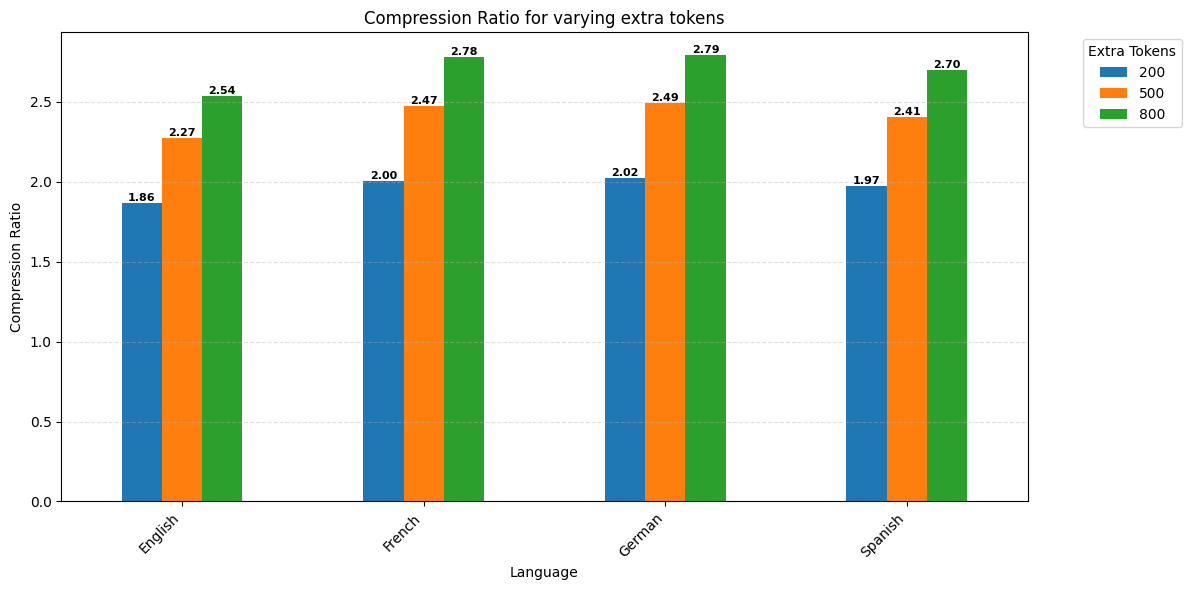

In [39]:
df_comp_all = pd.DataFrame(final1,columns=[200,500,800],index=lang_list)

ax = df_comp_all.plot(kind='bar', figsize=(12, 6))

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8, fontweight='bold')

# Set x-axis label
plt.xlabel("Language")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set title
plt.title("Compression Ratio for varying extra tokens")

# Add legend with better positioning
plt.legend(title="Extra Tokens", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add y-axis label for clarity
plt.ylabel("Compression Ratio")

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Ensure everything fits nicely
plt.tight_layout()
plt.show()

## Step 7: Write code for varying input file size and see effect on compression ratio (only for English language).

- Create text files with decreasing sizes using the scaling factors: 10, 8, 6.

- Note that the final vocabulary size you can consider = Original vocabulary size + 5% of the total text size.

Hint: Here is how you can use scaling factor of let's say 10.


```
fraction = 1 / 10

subtext = input_text[:int(len_text * fraction)]
```



In [ ]:
output_size = []
ratio_list = [10,8,6]
for ratio in ratio_list:
  _, tokens = read_file_tokenize('input.txt',ratio)
  extra = int(len(tokens) * 0.05)
  print(extra)
  output_size.append(get_bpe_compression_ratio(tokens,extra))

Total number of character: 111539
5576


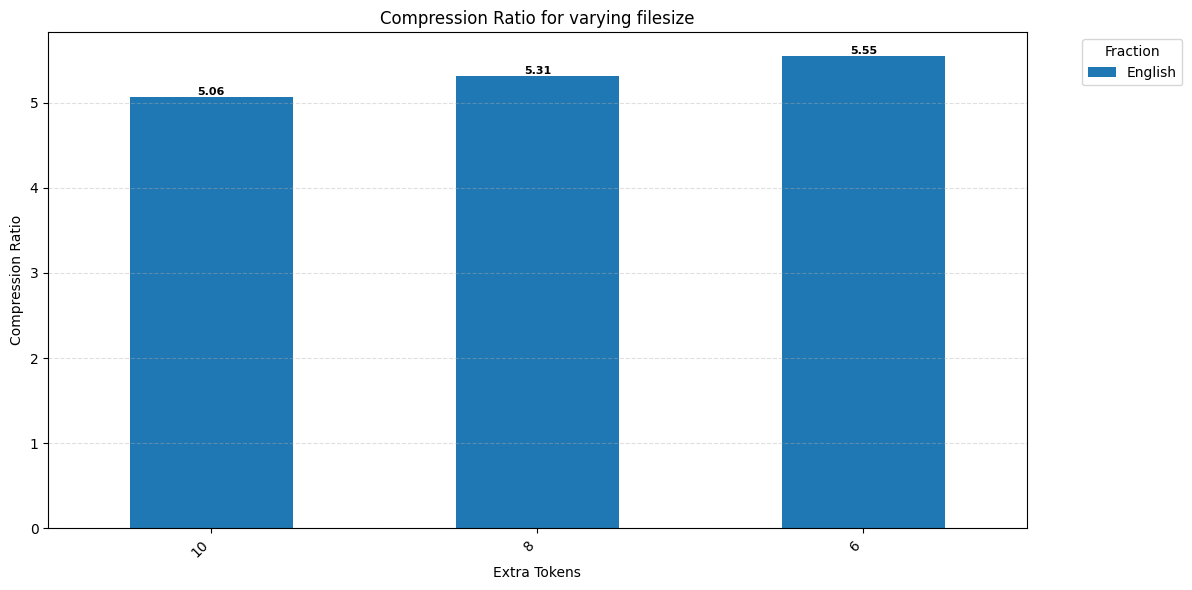

In [38]:
import pandas as pd
df_comp = pd.DataFrame([output_size],columns=ratio_list)
df_comp = df_comp.T
df_comp.columns = ['English']

ax = df_comp.plot(kind='bar', figsize=(12, 6))

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8, fontweight='bold')

# Set x-axis label
plt.xlabel("Extra Tokens")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set title
plt.title("Compression Ratio for varying filesize")

# Add legend with better positioning
plt.legend(title="Fraction", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add y-axis label for clarity
plt.ylabel("Compression Ratio")

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Ensure everything fits nicely
plt.tight_layout()
plt.show()